In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
%matplotlib inline


In [3]:
df = pd.read_excel('DR2.2014_3.xls')
df.tail()

,Unnamed: 0,Date,CPI_M_CHI,IP2_EA_M
79,NaN,2020-08-01,100.0,116.8
80,NaN,2020-09-01,99.9,118.3
81,NaN,2020-10-01,100.4,123.5
82,NaN,2020-11-01,100.7,124.9
83,NaN,2020-12-01,100.8,141.1


<AxesSubplot:xlabel='Date'>

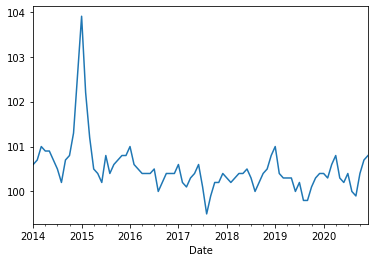

In [7]:
#1 НАМАЛЕВИЧ
#ряд индекса месячной инфляции
df.CPI_M_CHI.plot()

In [8]:
df.index
df.index = pd.PeriodIndex(df.Date, freq='M')

<AxesSubplot:xlabel='Date'>

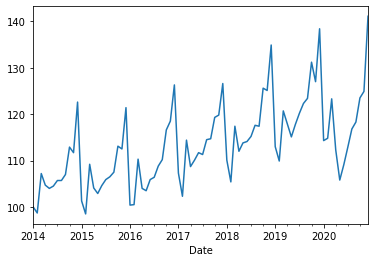

In [9]:
#ряд индекса промышленного производства ОКВЭД с поправкой на сезонность
df.IP2_EA_M.plot()

In [10]:
#автокорреляционная функция для инфляции(ACF):
plot_acf(df.CPI_M_CHI)
pyplot.show()

NameError: name 'plot_acf' is not defined

In [11]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


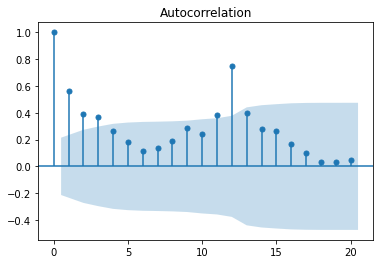

In [14]:
#автокорреляционная функция для пром.производства:
plot_acf(df.IP2_EA_M)
pyplot.show()

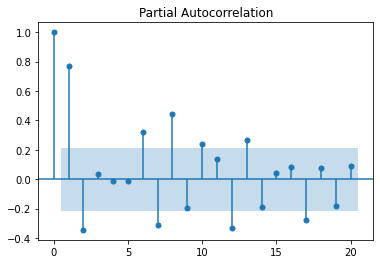

In [12]:
#PACF для ряда инфляции:
plot_pacf(df.CPI_M_CHI)
pyplot.show()

c:\users\doron\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


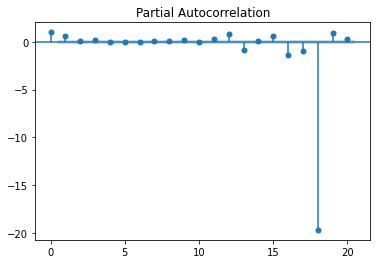

In [16]:
#PACF для ряда пром.производства:
plot_pacf(df.IP2_EA_M)
pyplot.show()


<AxesSubplot:>

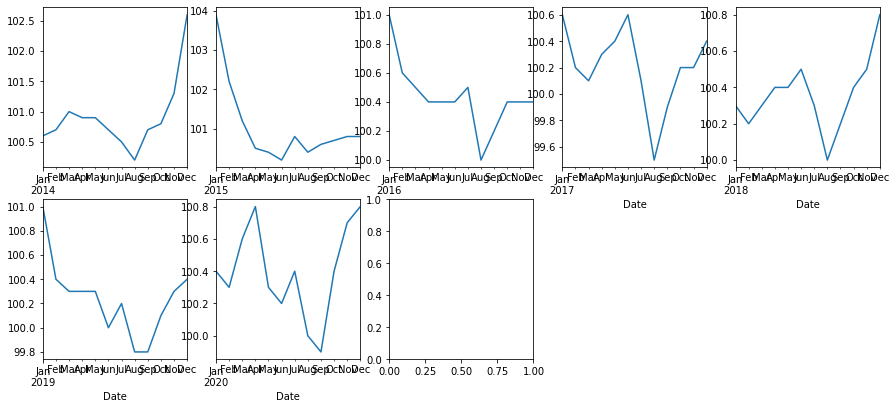

In [13]:
plt.figure(figsize= [15, 10])
plt.subplot(3, 5, 1)
df.CPI_M_CHI[0:12].plot()
plt.subplot(3, 5, 2)
df.CPI_M_CHI[12:24].plot()
plt.subplot(3, 5, 3)
df.CPI_M_CHI[24:36].plot()
plt.subplot(3, 5, 4)
df.CPI_M_CHI[36:48].plot()
plt.subplot(3, 5, 5)
df.CPI_M_CHI[48:60].plot()
plt.subplot(3, 5, 6)
df.CPI_M_CHI[60:72].plot()
plt.subplot(3, 5, 7)
df.CPI_M_CHI[72:84].plot()
plt.subplot(3, 5, 8)


<AxesSubplot:>

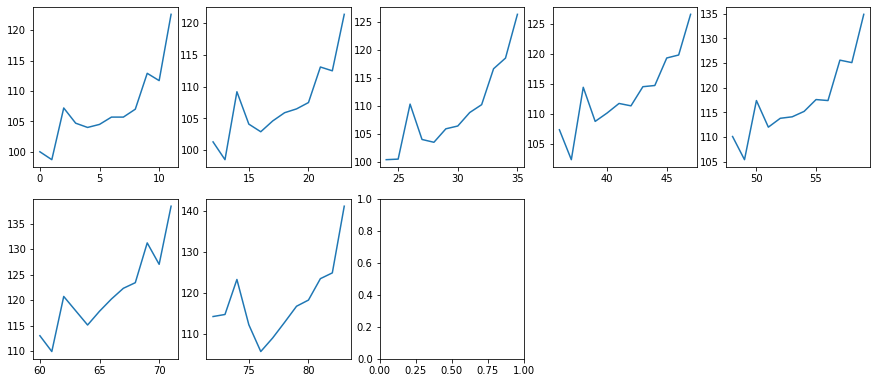

In [70]:
#ДЛЯ РЯДА ПРОМ.ПРОИЗВОДСТВА:
plt.figure(figsize= [15, 10])
plt.subplot(3, 5, 1)
df.IP2_EA_M[0:12].plot()
plt.subplot(3, 5, 2)
df.IP2_EA_M[12:24].plot()
plt.subplot(3, 5, 3)
df.IP2_EA_M[24:36].plot()
plt.subplot(3, 5, 4)
df.IP2_EA_M[36:48].plot()
plt.subplot(3, 5, 5)
df.IP2_EA_M[48:60].plot()
plt.subplot(3, 5, 6)
df.IP2_EA_M[60:72].plot()
plt.subplot(3, 5, 7)
df.IP2_EA_M[72:84].plot()
plt.subplot(3, 5, 8)

In [17]:
#ТВИТТЕР: Кратко прокомментируй полученные графики. Явлются ли ряды сезонными? есть ли тренд? стационарны ли ряды? есть ли точки излома? растёт ли амплитуда колебаний ряда? Возьми логарифм ряда, если душа тянется к логарифму.
#1)Ряд пром.производства: сезонность присутствует, на каждом графике видны всплески в начале года (нумерация месяцев от января 2014: каждый график показывает динамику производства за определенный год)
#Иногда, например в 2020 году(третий график второго ряда слева направо) и в 2015 производство не падало в начале года, показывая нейтральную динамику. Тем не менее, абсолютно в каждом году происзодил всплеск к началу весны. Очевидно, ряд имеет восходящий тренд, что можно объяснить более активным задействованием производственных мощностей к концу года и началу зиму, когда топливо находится в большем спросе.
# В виду восходящего тренда и отсутствия скачков, ряд пром. производства нестационарен.
#Точку излома визуально обнаружить нельзя.
#Аплитуда колебаний несколько растет в 18,19 и 20 годах, но в целом волатильность находилась в достаточно ограниченных и предсказуемых рамках.
#2)Ряд инфляции: Сезонный тренд отсутствует.Присутствуют сильные колебания, но привязать их к определенным месяцам трудно. 
#Тренд скорее нисходящий, что подтверждает автокорреляционная функция, которая снижается, хоть и с рывками.
#Точка излома наблюдается в начале 2015 года(резкий рост в 2014, а после резкое падение), когда начался долгосрочный снижающийся тренд.
#Амплитуда колебаний высокая в 2014 и 15 годах, далее она снижается и находится в стабильных границах.
df['ln_cpi'] = np.log(df.CPI_M_CHI)

In [16]:
df['ln_PP'] = np.log(df.IP2_EA_M)

In [80]:
df.tail()


,Unnamed: 0,T,CPI_M_CHI,IP2_EA_M
79,80,2020-08-01,100.0,116.8
80,81,2020-09-01,99.9,118.3
81,82,2020-10-01,100.4,123.5
82,83,2020-11-01,100.7,124.9
83,84,2020-12-01,100.8,141.1


In [18]:
#Делим выборку на тестовую и обучающую
CPI_training = df.ln_cpi[0:72]
CPI_test= df.ln_cpi[72:]
PP_training = df.ln_PP[0:72]
PP_test= df.ln_PP[72:]
CPI = CPI_training + CPI_test


In [14]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import (MeanAbsoluteError,mean_absolute_error)

MAE naive: 0.002158127141098124


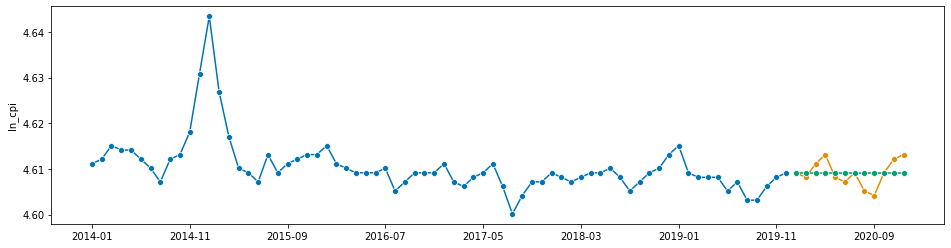

In [34]:
fh = ForecastingHorizon(CPI_test.index, is_relative=False)
fh
#какие-то странности с Хиндманом ЕТS(AAA) И ETS AIC, в пайчарме выводит графики с прогнозами, а тут нет, команды должны быть правильными
#наивный прогноз
naive_forecaster = NaiveForecaster(strategy="last")
naive_forecaster.fit(CPI_training, X=PP_training)
CPI_naive_pred = naive_forecaster.predict(fh)
plot_series(CPI_training, CPI_test, CPI_naive_pred)
print("MAE naive:", mean_absolute_error(CPI_naive_pred, CPI_test))





MAE Seasonal naive: 0.002738195465876503


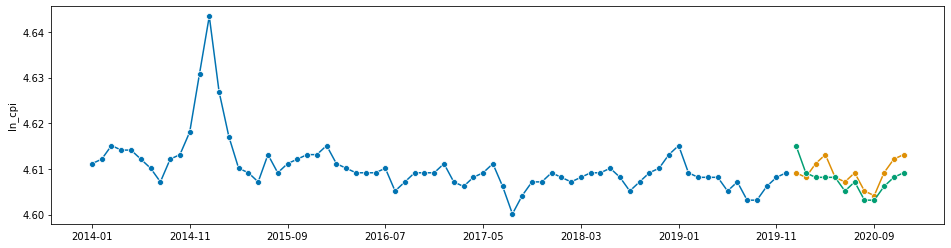

In [39]:
#сезонный наивный
seasonal_naive_forecaster = NaiveForecaster(strategy="last", sp=12)
seasonal_naive_forecaster.fit(CPI_training, X=PP_training)
CPI_seasonal_naive_pred = seasonal_naive_forecaster.predict(fh)
plot_series(CPI_training, CPI_test, CPIseasonal_naive_pred)
print("MAE Seasonal naive:", mean_absolute_error(CPI_seasonal_naive_pred, CPI_test))


Mae SARIMA(1,1,1)(1,0,0)[12]: 0.0020446274500696138


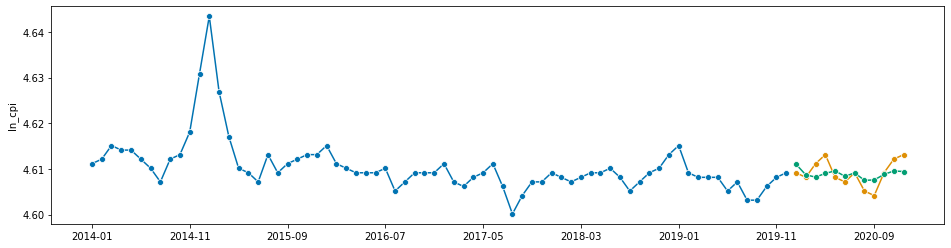

In [40]:
#SARIMA(1,1,1)(1,0,0)[12]
SARIMA_forecaster = ARIMA (order=(1, 1, 1), seasonal_order=(1, 0, 0, 12), suppress_warnings=True)
SARIMA_forecaster.fit(CPI_training, X=pd.DataFrame(PP_training))
SARIMA_CPI_pred = SARIMA_forecaster.predict(fh, X=pd.DataFrame(PP_test))
plot_series(CPI_training, CPI_test, SARIMA_CPI_pred)
print("Mae SARIMA(1,1,1)(1,0,0)[12]:", mean_absolute_error(SARIMA_CPI_pred, CPI_test))


In [ ]:
#Алгоритм Хиндмана -- Хандакара автоматического подбора SARIMA[12]

aARIMA_forecaster = AutoARIMA(sp=12, supw=True)
aARIMA_forecaster.fit(CPI_training, X=pd.DataFrame(PP_training))
aARIMA_CPIpred = aARIMA_forecaster.predict(fh, X=pd.DataFrame(PP_testing))
plot_series(CPI_training, CPI_test, aARIMA_CPI_pred)
print("MAE autoSARIMA:", mean_absolute_error(aARIMA_CPIpred, CPI_testing))
#ETS(AAA)
from sktime.forecasting.ets import ETSModel
ETS_forecaster = ETSModel(CPI_training, seasonal="additive")
ETS_fit = ets_forecaster.fit()
CPI_ETSpred = ETS_fit.get_prediction(start='72', end='84')
CPI_ETSpred = unemp_ets_pred.summary_frame(alpha=0.1)
plot_series(CPI_training, CPI_test, CPI_ETSpred ['mean'])
print("MAE ETS(AAA):", mean_absolute_error(CPI_ETSpred['mean'], CPI_test))
from sktime.forecasting.ets import AutoETS

#ETS AIC
aETS_forecaster = AutoETS(auto=True, seasonal_period=12, i_c ='aic')
aETS_forecaster.fit(CPI_training, X=PP_training)
CPI_aETS_pred = aETS_forecaster.predict(fh)
plot_series(CPI_training, CPI_test, CPI_aETS_pred)
print("MAE Auto ETS:", mean_absolute_error(CPI_aETS_pred, CPI_testing))
#здесь все
